In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/rec-amz-Books.edges', header=None)

In [3]:
data

,0,1,2,3
0,AH2L9G3DQHHAJ,0000000116,4.0,1019865600
1,A2IIIDRK3PRRZY,0000000116,1.0,1395619200
2,A1TADCM7YWPQ8M,0000000868,4.0,1031702400
3,AWGH7V0BDOJKB,0000013714,4.0,1383177600
4,A3UTQPQPM4TQO0,0000013714,5.0,1374883200
...,...,...,...,...
22507150,A20KO0BPMNREJL,B00M13FNSS,5.0,1406073600
22507151,A1BQO66R6OLCCW,B00M13FNSS,5.0,1406073600
22507152,A1CI87FHKK6HVC,B00M13FNSS,5.0,1406073600
22507153,A8W4BR3HGGS3C,B00M13FNSS,5.0,1406073600


In [37]:
#prvych n riadkov....
n = 20000
data_sample = data.iloc[:n,0:2]
B = nx.Graph()
B.add_nodes_from(data_sample[0], bipartite=0)
B.add_nodes_from(data_sample[1],bipartite=1)
B.add_edges_from(data_sample.apply(tuple, axis=1))

In [38]:
bipartite.is_bipartite(B)

True

In [ ]:
nx.draw(B, nx.bipartite_layout(B, data_sample[0]))

In [40]:
G_rec = bipartite.projected_graph(B, data_sample[0])
G_knihy = bipartite.projected_graph(B, data_sample[1])

In [60]:
#kompletnost grafu
print("hustota recenzentov:", nx.density(G_rec))
print("hustota knih:", nx.density(G_knihy))

hustota recenzentov 0.21269450433030873
hustota knih 0.0014285348931521663


In [ ]:
nx.draw(G_rec)

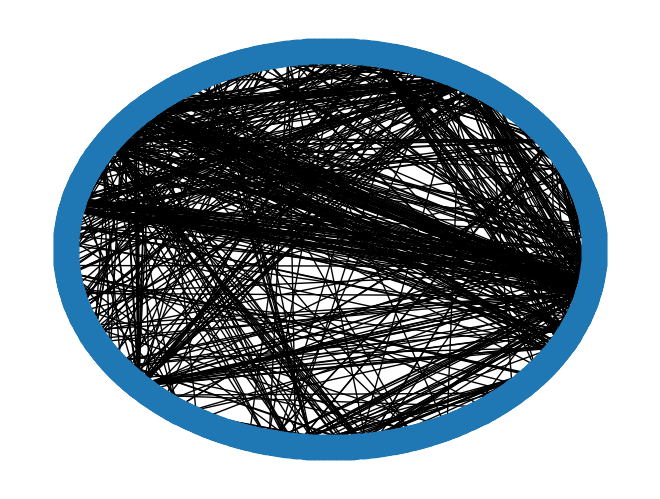

In [52]:
nx.draw_circular(G_knihy)

In [42]:
#je graf 1 komponent?
print(nx.is_connected(G_knihy))

#mozeme najst max cestu - diameter

False


In [58]:
print(nx.is_connected(B))

False


In [45]:
largest_component = max(nx.connected_components(G_knihy), key=len)
subgraph = G_knihy.subgraph(largest_component)
print("diameter najvacsieho komponentu:", nx.diameter(subgraph))

diameter najvacsieho komponentu: 11


In [43]:
#zhlukovy koeficient, triadic closure, clustering coefficient
print("zhlukovy koeficient:", nx.transitivity(G_knihy))

zhlukovy koeficient: 0.6057656995960338


In [46]:
G_knihy.nodes()

NodeView(('0000000116', '0000000868', '0000013714', '0000015393', '0000029831', '0000038504', '0000041696', '0000095699', '0000174076', '0000202010', '0000230022', '0000401048', '0000477141', '000047715X', '0000619574', '000077135X', '0000913154', '000100039X', '0001001787', '0001006002', '0001006657', '0001018043', '0001019880', '000102521X', '0001026038', '0001035649', '0001042335', '0001047566', '0001048236', '0001048775', '0001048791', '0001048813', '0001053396', '0001053655', '0001053744', '0001055178', '0001056107', '0001056530', '0001057138', '0001057146', '0001057170', '0001057324', '0001061100', '0001061127', '0001062395', '0001064487', '0001072986', '0001127748', '0001148427', '0001203010', '0001203088', '0001360000', '0001360183', '0001360779', '0001361139', '0001361155', '000136118X', '0001371037', '0001371045', '0001374400', '0001380877', '0001381245', '0001381733', '0001382489', '0001384155', '0001384163', '0001384198', '0001386301', '0001436163', '0001437879', '000146868